# Filtering Networks
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cytoscape/py4cytoscape/blob/0.0.10/doc/tutorials/Filtering-Networks.ipynb)

**by Kozo Nishida, Kristina Hanspers, Alexander Pico, Barry Demchak**

**py4cytoscape 0.0.11**

This notebook will introduce you to some techniques for filtering a network based on node properties. You will learn to:

- Select a set of nodes based on node degree and attribute filters
- Create a subnetwork based on selected nodes
- Hide a set of nodes based on filters

For this tutorial, we will use data from the STRING database (https://string-db.org/).

## Prerequisites
In addition to this package (py4cytoscape), you will need:

- Cytoscape 3.8 or greater, which can be downloaded from https://cytoscape.org/download.html. Simply follow the installation instructions on screen.
- Complete installation wizard
- Launch Cytoscape
- If your Cytoscape is 3.8.2 or earlier, install FileTransfer App (Follow [here](https://py4cytoscape.readthedocs.io/en/0.0.10/tutorials/index.html) to do it.)

**NOTE: To run this notebook, you must manually start Cytoscape first – don’t proceed until you have started Cytoscape.**

### Setup required only in a remote notebook environment
If you're using a remote Jupyter Notebook environment such as Google Colab, run the cell below.
(If you're running a local Jupyter Notebook server on the desktop machine same with Cytoscape, you don't need to do that.)

In [1]:
_PY4CYTOSCAPE = 'git+https://github.com/cytoscape/py4cytoscape@0.0.11'
import requests
exec(requests.get("https://raw.githubusercontent.com/cytoscape/jupyter-bridge/master/client/p4c_init.py").text)
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

Note that to use the current py4cytoscape release (instead of v0.0.11), remove the _PY4CYTOSCAPE= line in the snippet above.


### Sanity test to verify Cytoscape connection
By now, the connection to Cytoscape should be up and available. To verify this, try a simple operation that doesn't alter the state of Cytoscape.

In [1]:
import py4cytoscape as p4c
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.8.2',
 'automationAPIVersion': '1.2.0',
 'py4cytoscapeVersion': '0.0.10'}

## Get network from STRING
We are going to query the STRING Disease database for the term “breast cancer”. By default, the app pulls the top 100 human proteins associated with the disease along with edges having an evidence strength of 0.4 or greater:

In [2]:
p4c.install_app('STRINGapp')

{}


{}

In [3]:
string_cmd = 'string disease query disease="breast cancer"'
p4c.commands_run(string_cmd)
string_net = p4c.get_network_suid()

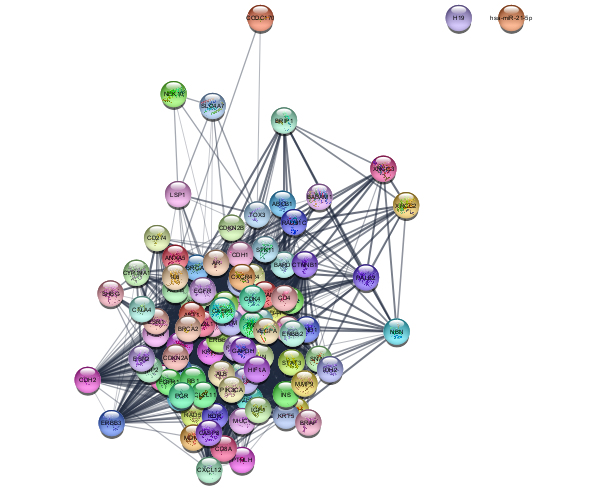

In [4]:
p4c.notebook_show_image()

## Filtering by degree
### Creating a degree filter
Every node in a network has a Degree property, which corresponds to the number of edges connecting the node to other nodes, either as a target or source. Filtering based on node degree is a useful way to remove nodes with too few (or too many) connections.

In this example we want to exclude low degree nodes, e.g., those with only 0, 1 or 2 connections:


In [5]:
p4c.create_degree_filter('degree filter', [0,2], 'IS_NOT_BETWEEN')

No edges selected.


Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


{'nodes': ['9606.ENSP00000011653',
  '9606.ENSP00000296511',
  '9606.ENSP00000369816',
  '9606.ENSP00000302564',
  '9606.ENSP00000265171',
  '9606.ENSP00000386559',
  '9606.ENSP00000288602',
  '9606.ENSP00000451974',
  '9606.ENSP00000263025',
  '9606.ENSP00000354558',
  '9606.ENSP00000261769',
  '9606.ENSP00000407586',
  '9606.ENSP00000372023',
  '9606.ENSP00000269141',
  '9606.ENSP00000371194',
  '9606.ENSP00000441765',
  '9606.ENSP00000361021',
  '9606.ENSP00000256078',
  '9606.ENSP00000484824',
  '9606.ENSP00000317272',
  '9606.ENSP00000352408',
  '9606.ENSP00000437955',
  '9606.ENSP00000275493',
  '9606.ENSP00000229239',
  '9606.ENSP00000410294',
  '9606.ENSP00000351273',
  '9606.ENSP00000343925',
  '9606.ENSP00000344456',
  '9606.ENSP00000261584',
  '9606.ENSP00000277541',
  '9606.ENSP00000263923',
  '9606.ENSP00000278616',
  '9606.ENSP00000336701',
  '9606.ENSP00000331897',
  '9606.ENSP00000227507',
  '9606.ENSP00000268035',
  '9606.ENSP00000267101',
  '9606.ENSP00000252242',
  '

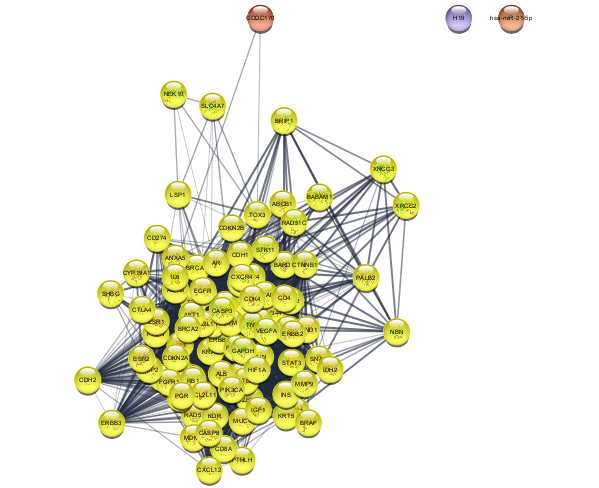

In [6]:
p4c.notebook_show_image()

At the bottom of the Select tab, you can see how many edges/nodes where selected.

### Creating a subnetwork from a selection

We can now create a new network, or subnetwork, from our selected set of nodes and all relevant edges:

In [7]:
p4c.create_subnetwork(subnetwork_name='Breast cancer: highly connected nodes')

5447

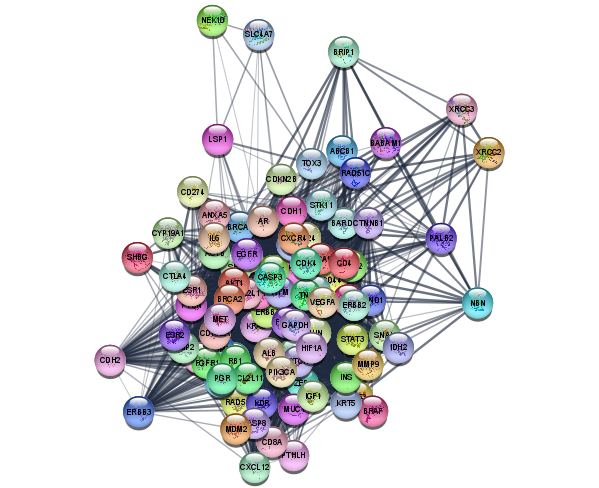

In [8]:
p4c.notebook_show_image()

## Filtering by attribute

### Creating a column filter

We could also filter the network based on high disease score. The disease score comes from STRING and indicates the strength of the association to the disease queried.

Let’s select nodes from the original network with a disease score of greater than 4 (on a scale of 1-5):

In [9]:
p4c.create_column_filter(filter_name='disease score filter', column='stringdb::disease score', criterion=4, predicate='GREATER_THAN', network=string_net)

No edges selected.


Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


{'nodes': ['9606.ENSP00000451974',
  '9606.ENSP00000261769',
  '9606.ENSP00000372023',
  '9606.ENSP00000371194',
  '9606.ENSP00000361021',
  '9606.ENSP00000275493',
  '9606.ENSP00000410294',
  '9606.ENSP00000351273',
  '9606.ENSP00000344456',
  '9606.H19',
  '9606.ENSP00000261584',
  '9606.ENSP00000278616',
  '9606.ENSP00000336701',
  '9606.ENSP00000418960',
  '9606.ENSP00000219746',
  '9606.ENSP00000324856',
  '9606.ENSP00000390265',
  '9606.ENSP00000265433',
  '9606.ENSP00000260947',
  '9606.ENSP00000303939',
  '9606.ENSP00000269571',
  '9606.ENSP00000259008',
  '9606.ENSP00000382423',
  '9606.ENSP00000379683',
  '9606.ENSP00000309572',
  '9606.ENSP00000372088',
  '9606.ENSP00000269305',
  '9606.ENSP00000352271',
  '9606.ENSP00000369497',
  '9606.ENSP00000405330',
  '9606.ENSP00000451828'],
 'edges': None}

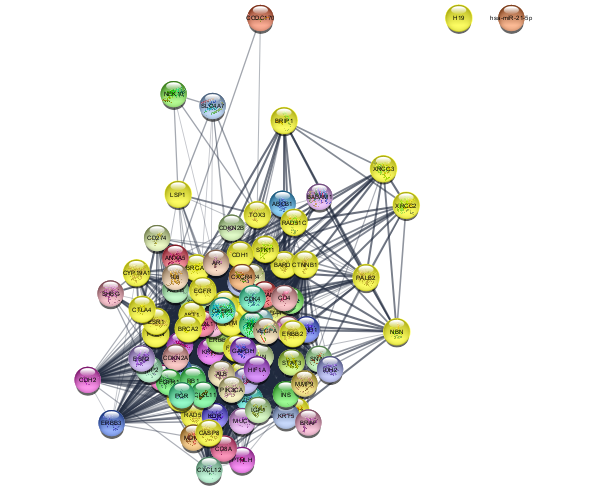

In [10]:
p4c.notebook_show_image()

Again, we can create a subnetwork from the selection:

In [11]:
p4c.create_subnetwork(subnetwork_name='Breast cancer: high disease score')

8132

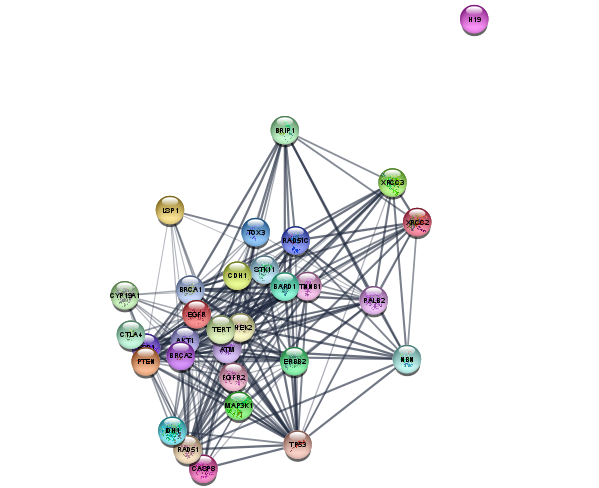

In [12]:
p4c.notebook_show_image()

## Combining filters
But what if we want to combine these two filters? You could apply them sequentially as individual filters, but then you’d need to be careful about the order in which you apply the filters. Alternatively, you can create a composite filter and apply the logic all at once!

Let’s combine the two filters “degree filter” and “disease score” to produce one filter, then apply it to the original network and create a final subnetwork:

In [13]:
p4c.create_composite_filter('combined filter', ['degree filter','disease score filter'], network=string_net)

No edges selected.


Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


{'nodes': ['9606.ENSP00000451974',
  '9606.ENSP00000261769',
  '9606.ENSP00000372023',
  '9606.ENSP00000371194',
  '9606.ENSP00000361021',
  '9606.ENSP00000275493',
  '9606.ENSP00000410294',
  '9606.ENSP00000351273',
  '9606.ENSP00000344456',
  '9606.ENSP00000261584',
  '9606.ENSP00000278616',
  '9606.ENSP00000336701',
  '9606.ENSP00000418960',
  '9606.ENSP00000219746',
  '9606.ENSP00000324856',
  '9606.ENSP00000390265',
  '9606.ENSP00000265433',
  '9606.ENSP00000260947',
  '9606.ENSP00000303939',
  '9606.ENSP00000269571',
  '9606.ENSP00000259008',
  '9606.ENSP00000382423',
  '9606.ENSP00000379683',
  '9606.ENSP00000309572',
  '9606.ENSP00000372088',
  '9606.ENSP00000269305',
  '9606.ENSP00000352271',
  '9606.ENSP00000369497',
  '9606.ENSP00000405330',
  '9606.ENSP00000451828'],
 'edges': None}

In [14]:
p4c.create_subnetwork(subnetwork_name='final subnetwork')

8423

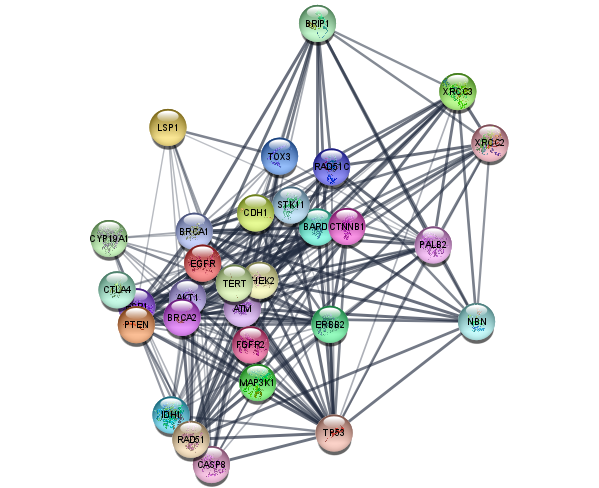

In [15]:
p4c.notebook_show_image()

We can apply a layout to help with interpreting the network:

In [16]:
p4c.layout_network('force-directed defaultSpringCoefficient=5E-6')

{}

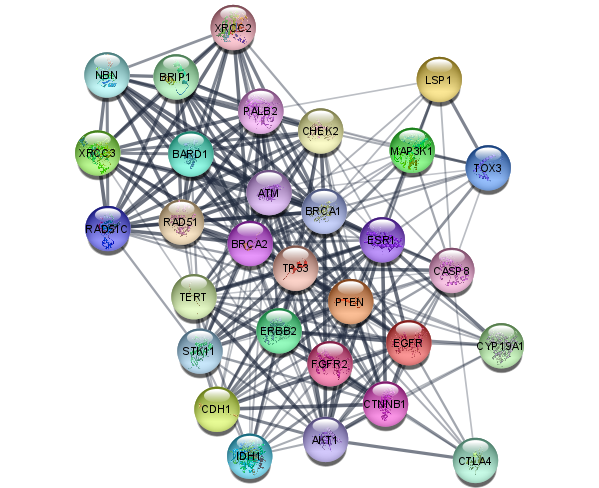

In [17]:
p4c.notebook_show_image()

This final network obviously contains fewer nodes than the original, but they are the most connected and most highly associated with the disease. If you examine the network you can see several well-known breast cancer oncogenes, for example BRCA1, TP53 and PTEN, near the center of the action.

## Hiding filtered nodes

As a final example of the filter functions, let’s return to the orignal network once more and apply our “combined filter”. But this time let’s *hide* the filtered out nodes, rather than forming a selection. This demonstrates the *applyFilter* function and the *hide* parameter that is optional for all *createXXXFilter* functions as well.

In [18]:
p4c.apply_filter('combined filter', hide=True, network=string_net)

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['9606.ENSP00000451974',
  '9606.ENSP00000261769',
  '9606.ENSP00000372023',
  '9606.ENSP00000371194',
  '9606.ENSP00000361021',
  '9606.ENSP00000275493',
  '9606.ENSP00000410294',
  '9606.ENSP00000351273',
  '9606.ENSP00000344456',
  '9606.ENSP00000261584',
  '9606.ENSP00000278616',
  '9606.ENSP00000336701',
  '9606.ENSP00000418960',
  '9606.ENSP00000219746',
  '9606.ENSP00000324856',
  '9606.ENSP00000390265',
  '9606.ENSP00000265433',
  '9606.ENSP00000260947',
  '9606.ENSP00000303939',
  '9606.ENSP00000269571',
  '9606.ENSP00000259008',
  '9606.ENSP00000382423',
  '9606.ENSP00000379683',
  '9606.ENSP00000309572',
  '9606.ENSP00000372088',
  '9606.ENSP00000269305',
  '9606.ENSP00000352271',
  '9606.ENSP00000369497',
  '9606.ENSP00000405330',
  '9606.ENSP00000451828'],
 'edges': None}

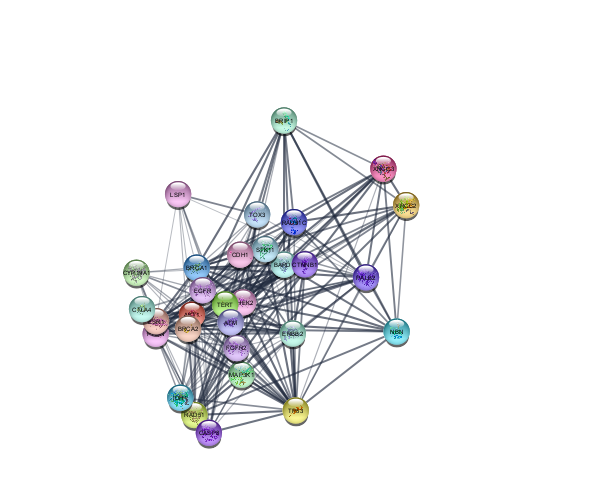

In [19]:
p4c.notebook_show_image()